# 1. Imports

In [233]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style = 'white',context = 'notebook', palette = 'muted')

# 2.1 Data

In [234]:
train_file = '/Users/jerryyileibao/Downloads/train.csv'
test_file = '/Users/jerryyileibao/Downloads/test.csv'

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# 2.2 Check shape

In [235]:
print('train shape: ',train.shape)
print('test shape: ',test.shape)

#difference in num of columns lie in 'Survived'

train shape:  (891, 12)
test shape:  (418, 11)


# 2.3 Append into full dataset

In [236]:
full = train.append(test,ignore_index=True)

# 3.1 Check info

In [237]:
full.info()

# age missing some
# fare missing 1
# cabin missing a lot
# embarked missing 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# 3.2.1 Plot the survival rate vs Embarked location

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

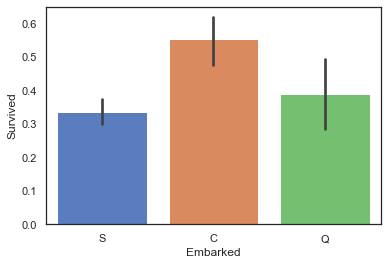

In [238]:
sns.barplot(data=train,x='Embarked',y='Survived')

Those embarked from Cherbourg have the higest survival rate

# 3.2.2 Plot the survival rate vs parch (# of parent/children)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

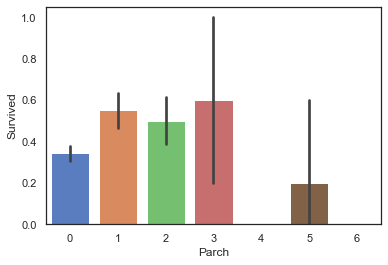

In [239]:
sns.barplot(data=train,x='Parch',y='Survived')

Parch=3 (3 parents/children) group has the highest survival rate

# 3.2.3 Plot the survival rate vs SibSp (# of siblings / spouses)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

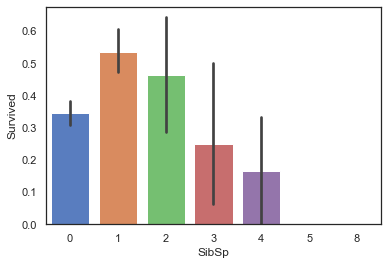

In [240]:
sns.barplot(data = train, x = 'SibSp', y = 'Survived')

Those with 1 or 2 siblings/spouses have the highest survival rate

# 3.2.4 Plot the survival rate vs Pclass

sns.barplot(data = train, x = 'Pclass', y = 'Survived')

Class 1 has the highest survival rate

# 3.2.5 Plot the survival rate vs gender

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

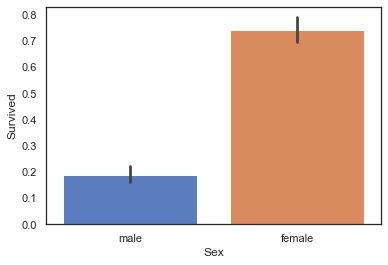

In [241]:
sns.barplot(data = train, x = 'Sex', y = 'Survived')

Female are more likely to survive

# 3.2.6 Plot the survival rate vs age

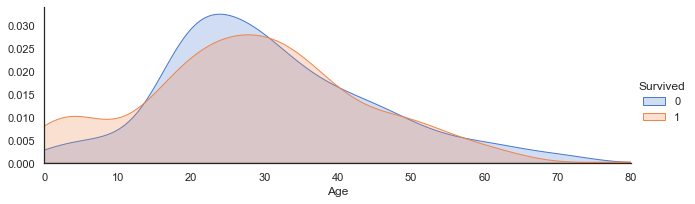

In [242]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

# 3.2.7 Plot the survival rate vs fare

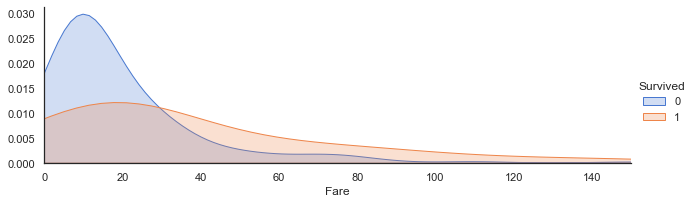

In [243]:
fareFacet = sns.FacetGrid(train,hue = 'Survived', aspect = 3)
fareFacet.map(sns.kdeplot,'Fare',shade = True)
fareFacet.set(xlim=(0,150))
fareFacet.add_legend()

In [244]:
## Check the distribution of fare

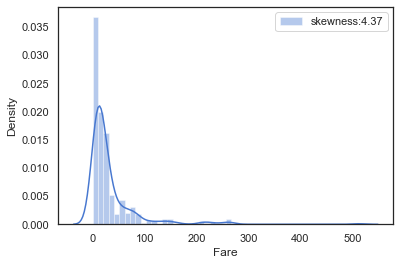

In [245]:
fare = sns.distplot(full['Fare'][full['Fare'].notnull()],label = 'skewness:%.2f'%(full['Fare'].skew()))
fare.legend()

In [246]:
## Since fare is very skewed to the right, we use log value to solve the problem of uneven distribution

In [247]:
full['Fare'] = full['Fare'].map(lambda x: np.log(x) if x>0 else 0)

# 4. Pre-processing

# 4.1 Data cleaning

## 4.1.1 Fill Cabin null value with NaN

In [251]:
full['Cabin']=full['Cabin'].fillna('U')

In [252]:
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

## 4.1.2 Fill Embarked null value 

In [254]:
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


In [255]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Since most people embarked from Southampton, we fill these two entries with Southampton

In [256]:
full['Embarked']=full['Embarked'].fillna('S')

## 4.1.3 Fill Fare null value

In [258]:
full[full['Fare'] == min(full['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,U,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,U,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,U,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,U,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,U,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,U,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,U,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,U,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,U,S


In [259]:
full[(full['Fare']==0)&(full['Pclass']==3)]['Fare'] = full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Fare']!=0)]['Fare'].mean()
full[(full['Fare']==0)&(full['Pclass']==2)]['Fare'] = full[(full['Pclass']==2)&(full['Embarked']=='S')&(full['Fare']!=0)]['Fare'].mean()
full[(full['Fare']==0)&(full['Pclass']==1)]['Fare'] = full[(full['Pclass']==1)&(full['Embarked']=='S')&(full['Fare']!=0)]['Fare'].mean()